In [1]:
import torch
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split
from torch import nn, optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
import itertools
import torch

/Users/mrinoybanerjee/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/mrinoybanerjee/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Number of samples in the dataset: 6400
Number of classes in the dataset: 4
Class names: ['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']
Number of samples in each class: {0: 896, 1: 64, 2: 3200, 3: 2240}


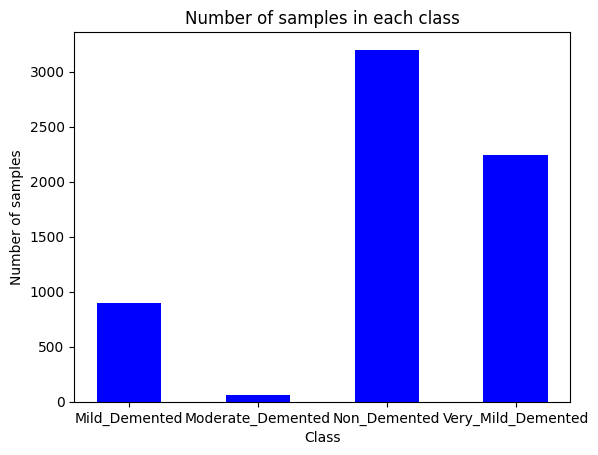

In [6]:
# Define the directory where the data is stored
# Replace with the path to your dataset
data_dir = '/Users/mrinoybanerjee/Desktop/Duke/Misc/Alzheimer_Detection/data/Dataset'

# Define transforms for the data
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.RandomVerticalFlip(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Load the dataset with ImageFolder
dataset = datasets.ImageFolder(data_dir, transform=transform)


# Perform EDA on the dataset
def eda(dataset):
    # Get the number of samples in the dataset
    n_samples = len(dataset)
    print(f"Number of samples in the dataset: {n_samples}")

    # Get the number of classes in the dataset
    n_classes = len(dataset.classes)
    print(f"Number of classes in the dataset: {n_classes}")

    # Get the class names
    class_names = dataset.classes
    print(f"Class names: {class_names}")

    # Get the number of samples in each class
    class_counts = {}
    for _, label in dataset:
        class_counts[label] = class_counts.get(label, 0) + 1
    print(f"Number of samples in each class: {class_counts}")

    # Create a bar plot of the number of samples in each class
    plt.bar(class_names, class_counts.values(), width=0.8, color='b')
    plt.xlabel("Class")
    plt.ylabel("Number of samples")
    plt.title("Number of samples in each class")
    plt.show()

eda(dataset)